In [29]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [30]:
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]=os.getenv("LANGCHAIN_PROJECT")
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")


In [31]:
from langchain_groq import ChatGroq

# Initialize Groq LLM
llm = ChatGroq(
    model= "llama-3.3-70b-versatile", #"llama-3.1-70b-versatile",  # or "mixtral-8x7b", "gemma2-9b-it", etc.
    temperature=0.5,
    max_tokens=1024,
   
)

In [32]:
from langchain_community.document_loaders import WebBaseLoader

In [34]:
loader=WebBaseLoader("https://python.langchain.com/docs/tutorials/llm_chain/")
loader

In [35]:
document=loader.load()
document

[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/llm_chain/', 'title': 'Build a RAG agent with LangChain - Docs by LangChain', 'language': 'en'}, page_content='Build a RAG agent with LangChain - Docs by LangChainSkip to main contentWe\'ve raised a $125M Series B to build the platform for agent engineering. Read more.Docs by LangChain home pageLangChain + LangGraphSearch...⌘KAsk AIGitHubTry LangSmithTry LangSmithSearch...NavigationLangChainBuild a RAG agent with LangChainLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonLearnTutorialsLangChainSemantic searchRAG agentSQL agentSupervisor agentLangGraphConceptual overviewsMemoryContextGraph APIFunctional APIAdditional resourcesLangChain AcademyCase studiesEnglishcloseOn this pageOverviewConceptsPreviewSetupInstallationLangSmithComponents1. IndexingLoading documentsSplitting documentsStoring documents2. Retrieval and GenerationRAG agentsRAG chainsNext stepsTutorialsLangChainBuild a RAG agent wi

In [36]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
documents=text_splitter.split_documents(document)
documents

[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/llm_chain/', 'title': 'Build a RAG agent with LangChain - Docs by LangChain', 'language': 'en'}, page_content="Build a RAG agent with LangChain - Docs by LangChainSkip to main contentWe've raised a $125M Series B to build the platform for agent engineering. Read more.Docs by LangChain home pageLangChain + LangGraphSearch...⌘KAsk AIGitHubTry LangSmithTry LangSmithSearch...NavigationLangChainBuild a RAG agent with LangChainLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonLearnTutorialsLangChainSemantic searchRAG agentSQL agentSupervisor agentLangGraphConceptual overviewsMemoryContextGraph APIFunctional APIAdditional resourcesLangChain AcademyCase studiesEnglishcloseOn this pageOverviewConceptsPreviewSetupInstallationLangSmithComponents1. IndexingLoading documentsSplitting documentsStoring documents2. Retrieval and GenerationRAG agentsRAG chainsNext stepsTutorialsLangChainBuild a RAG agent wit

In [37]:
from langchain_community.embeddings import SentenceTransformerEmbeddings

embeddings = SentenceTransformerEmbeddings(model_name = "all-mpnet-base-v2") 

In [38]:
from langchain_community.vectorstores import FAISS

vectorstore=FAISS.from_documents(documents,embeddings)
vectorstore

In [45]:
from langchain_core.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_template("""
You are an expert AI assistant. Use ONLY the information provided
in the context to answer the question. If the answer is not found,
say: "The context does not contain this information."

Context:
{context}

Question: {input}

Answer:
""")

In [46]:
from langchain_classic.chains.combine_documents import create_stuff_documents_chain


In [47]:

document_chain=create_stuff_documents_chain(llm,prompt)
document_chain

RunnableBinding(bound=RunnableBinding(bound=RunnableAssign(mapper={
  context: RunnableLambda(format_docs)
}), kwargs={}, config={'run_name': 'format_inputs'}, config_factories=[])
| ChatPromptTemplate(input_variables=['context', 'input'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'input'], input_types={}, partial_variables={}, template='\nYou are an expert AI assistant. Use ONLY the information provided\nin the context to answer the question. If the answer is not found,\nsay: "The context does not contain this information."\n\nContext:\n{context}\n\nQuestion: {input}\n\nAnswer:\n'), additional_kwargs={})])
| ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001E95A7C9810>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001E95A7CA210>, model_name='llama-3.3-70b-versatile', temperature=0.5, model_kwargs={}, groq_api_key=SecretStr('**********'), max_

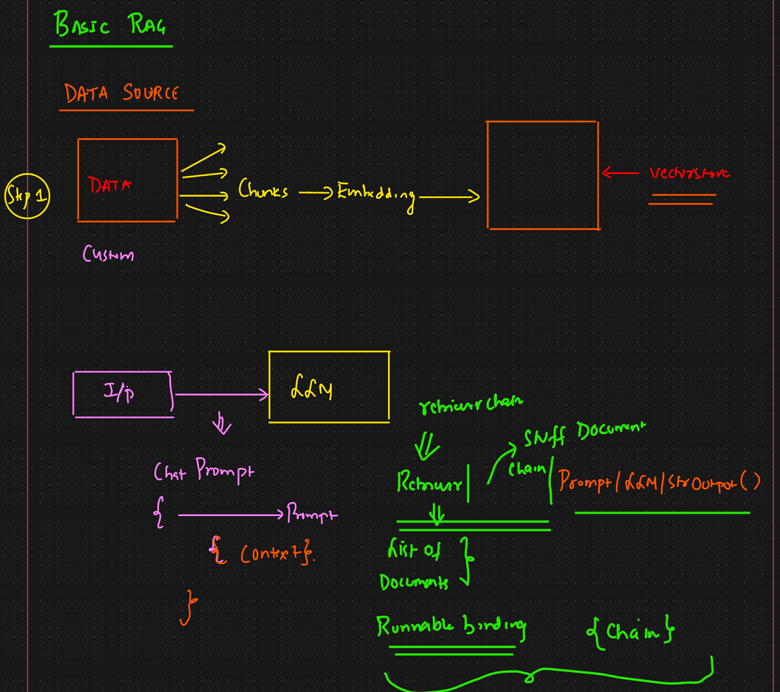

In [48]:
retriever = vectorstore.as_retriever()
from langchain.chains import create_retrieval_chain

retrievel_chain = create_retrieval_chain(retriever, document_chain)
retrievel_chain

RunnableBinding(bound=RunnableAssign(mapper={
  context: RunnableBinding(bound=RunnableLambda(lambda x: x['input'])
           | VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001E95A7C82D0>, search_kwargs={}), kwargs={}, config={'run_name': 'retrieve_documents'}, config_factories=[])
})
| RunnableAssign(mapper={
    answer: RunnableBinding(bound=RunnableBinding(bound=RunnableAssign(mapper={
              context: RunnableLambda(format_docs)
            }), kwargs={}, config={'run_name': 'format_inputs'}, config_factories=[])
            | ChatPromptTemplate(input_variables=['context', 'input'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'input'], input_types={}, partial_variables={}, template='\nYou are an expert AI assistant. Use ONLY the information provided\nin the context to answer the question. If the answer is n

In [49]:
result = retrievel_chain.invoke({"input": "explain RAG chains?"})

In [50]:
result

{'input': 'explain RAG chains?',
 'context': [Document(id='95685c4d-587a-4c6a-a5b3-a8f56f0add68', metadata={'source': 'https://python.langchain.com/docs/tutorials/llm_chain/', 'title': 'Build a RAG agent with LangChain - Docs by LangChain', 'language': 'en'}, page_content='A RAG agent that executes searches with a simple tool. This is a good general-purpose implementation.\nA two-step RAG chain that uses just a single LLM call per query. This is a fast and effective method for simple queries.\n\n\u200bConcepts\nWe will cover the following concepts:\n\n\nIndexing: a pipeline for ingesting data from a source and indexing it. This usually happens in a separate process.\n\n\nRetrieval and generation: the actual RAG process, which takes the user query at run time and retrieves the relevant data from the index, then passes that to the model.'),
  Document(id='da039974-df1a-4cc3-8cb8-53249b17efde', metadata={'source': 'https://python.langchain.com/docs/tutorials/llm_chain/', 'title': 'Build a

In [55]:
print(result['answer'])

RAG chains refer to a sequence of steps in a Retrieval-Augmentation-Generation (RAG) process. In a RAG chain, the process takes a user query at run time, retrieves relevant data from an index, and then passes that data to a model to generate an answer. A two-step RAG chain is mentioned, which uses just a single LLM (Large Language Model) call per query and is considered a fast and effective method for simple queries. The RAG chain involves two main steps: 
1. Retrieve: Given a user input, relevant splits are retrieved from storage using a Retriever.
2. Generate: A model produces an answer using a prompt that includes both the question with the retrieved data.
